**линейный классификатор**

правило Хэбба

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing   import MinMaxScaler

---

In [2]:
# загружаем даные
data = [
    np.loadtxt('../data/200_2b/points_1.txt'),
    np.loadtxt('../data/200_2b/points_2.txt')
]

In [3]:
# собираем вместе
X = np.vstack(data)

In [4]:
# метки классов
y = [ [i]*data[i].shape[0] for i in range(len(data)) ]
y = np.asarray(sum(y,[]))
y = y*2-1

In [5]:
X.shape, y.shape

((200, 2), (200,))

In [6]:
%xdel data

In [7]:
# нормируем данные
X = MinMaxScaler([-1.0,1.0]).fit_transform(X)

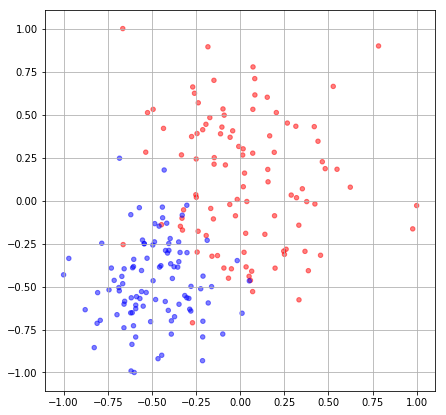

In [8]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [9]:
Xp = np.hstack([np.ones([X.shape[0],1]),X])
Xp.shape

(200, 3)

---

In [10]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([0.08316242, 0.12429548, 0.06218912])

---

In [11]:
def loss(x,w,y): return -x.dot(w)*y

In [12]:
MAX_ITER = 20 # максимальное число циклов обучения
# ERROR_BOUND = -Xp.shape[0]*0.99 # порог ошибки (количество ошибок)

ERROR_BOUND = -2.5

a = 0.7 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [13]:
q = loss(Xp,W,y).sum()
er_hist.append( q )

In [14]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):

    if stop: break

    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] < ERROR_BOUND: # проверяем достижение порога
            print( 'error bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break
            
        xj,yj = Xp[j,:],y[j]
                        
        r = np.sign( xj.dot(W) ) # выход
        
        if (r*yj)<0: W = W + a*xj.T.dot(y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        er_hist.append( q )     
        


error bound on epoch 1 step 11: -2.617547


In [15]:
print(W)
print(len(er_hist),er_hist[-1])

[-0.61683758 -2.10106406 -2.16347243]
249 -2.617546545274293


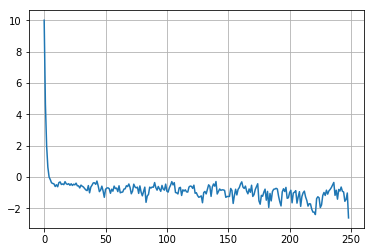

In [16]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [17]:
r = np.sign(Xp.dot(W)) 

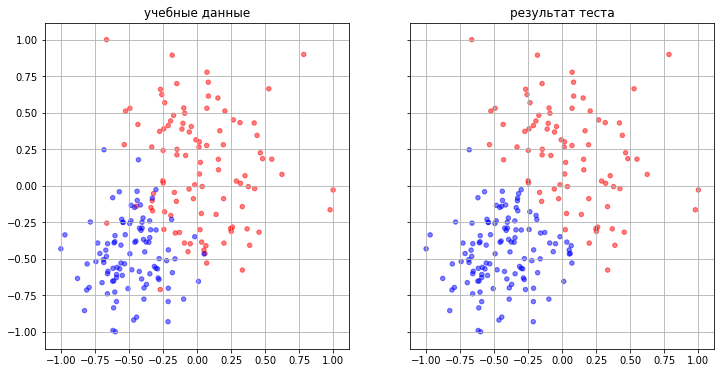

In [18]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in r ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
